<a href="https://colab.research.google.com/github/ravellasrilatha/Barnes-Hut-Simulation/blob/master/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib import pyplot as plt
from matplotlib import image as img
import os
import random
from PIL import Image
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "yogeshkhandare56"
os.environ['KAGGLE_KEY'] = "7788f9b761a1a8f81219c7927e26a42c"

In [4]:
!kaggle datasets download -d meetnagadia/human-action-recognition-har-dataset

100% 297M/297M [00:15<00:00, 22.4MB/s]
100% 297M/297M [00:15<00:00, 20.4MB/s]


In [5]:
!unzip human-action-recognition-har-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Human Action Recognition/train/Image_5499.jpg  
  inflating: Human Action Recognition/train/Image_55.jpg  
  inflating: Human Action Recognition/train/Image_550.jpg  
  inflating: Human Action Recognition/train/Image_5500.jpg  
  inflating: Human Action Recognition/train/Image_5501.jpg  
  inflating: Human Action Recognition/train/Image_5502.jpg  
  inflating: Human Action Recognition/train/Image_5503.jpg  
  inflating: Human Action Recognition/train/Image_5504.jpg  
  inflating: Human Action Recognition/train/Image_5505.jpg  
  inflating: Human Action Recognition/train/Image_5506.jpg  
  inflating: Human Action Recognition/train/Image_5507.jpg  
  inflating: Human Action Recognition/train/Image_5508.jpg  
  inflating: Human Action Recognition/train/Image_5509.jpg  
  inflating: Human Action Recognition/train/Image_551.jpg  
  inflating: Human Action Recognition/train/Image_5510.jpg  
  inflating: Human Action Recognition/

In [6]:
data = pd.read_csv('/content/Human Action Recognition/Training_set.csv')

In [7]:
counts = data['label'].value_counts()
counts

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [8]:
def chooserandom(n=1):
    plt.figure(figsize=(30,30))
    for i in range(n):
        rnd = random.randint(0,len(data)-1)
        img_file = '/content/Human Action Recognition/train/' + data['filename'][rnd]

        if os.path.exists(img_file):
            plt.subplot(n//2+1, 2, i + 1)
            image = img.imread(img_file)
            plt.imshow(image)
            plt.title(data['label'][rnd])

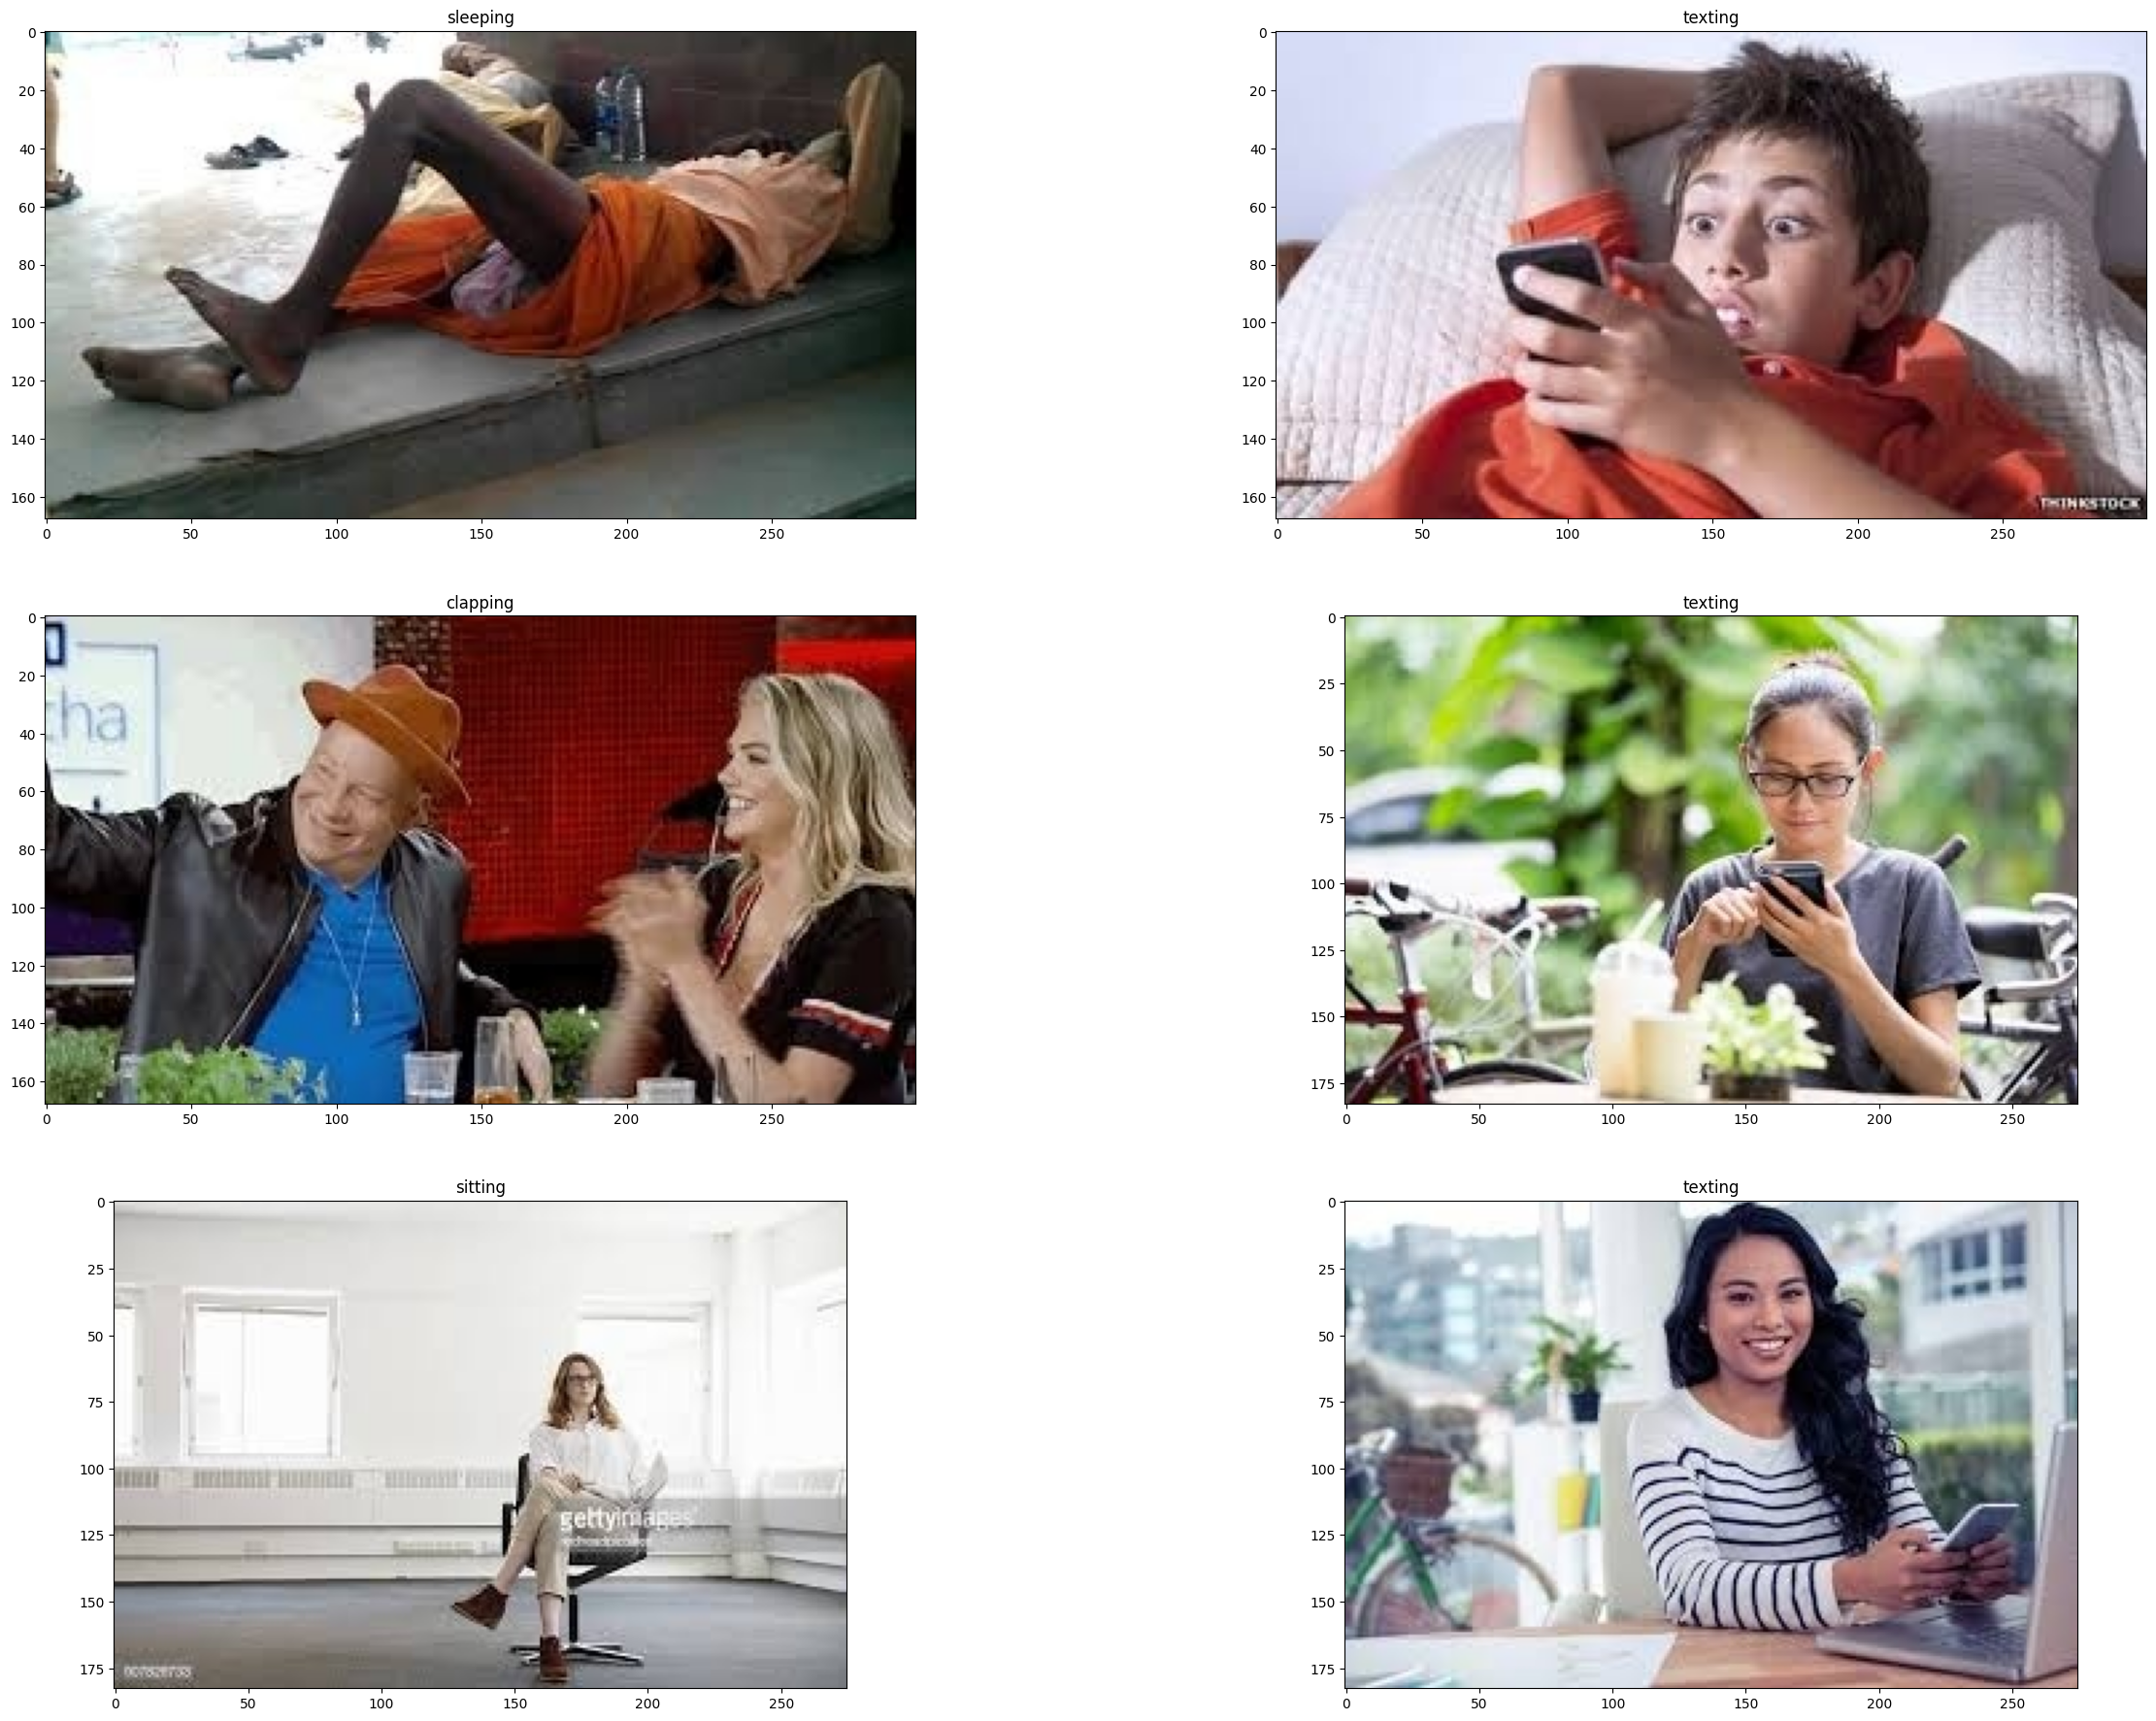

In [9]:
chooserandom(6)

In [10]:
encode = LabelBinarizer()
y = encode.fit_transform(data['label'])
classes = encode.classes_
print(classes)

['calling' 'clapping' 'cycling' 'dancing' 'drinking' 'eating' 'fighting'
 'hugging' 'laughing' 'listening_to_music' 'running' 'sitting' 'sleeping'
 'texting' 'using_laptop']


In [11]:
x = data['filename'].values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100)

In [13]:
img_data = []
size = len(x_train)

for i in range(size):
    image = Image.open('/content/Human Action Recognition/train/' + x_train[i])
    img_data.append(np.asarray(image.resize((160,160))))

In [14]:
model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(15, activation='softmax'))

58889256/58889256 [==============================] - 4s 0us/step


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 14,985,039
Trainable params: 270,351
Non-trainable params: 14,714,688
_________________________________________________________________


In [18]:
history = model.fit(np.asarray(img_data), y_train, epochs=60)

Epoch 1/60
355/355 [==============================] - 25s 70ms/step - loss: 0.0655 - accuracy: 0.9825
Epoch 2/60
355/355 [==============================] - 25s 71ms/step - loss: 0.0644 - accuracy: 0.9837
Epoch 3/60
355/355 [==============================] - 24s 67ms/step - loss: 0.0358 - accuracy: 0.9899
Epoch 4/60
355/355 [==============================] - 24s 68ms/step - loss: 0.0406 - accuracy: 0.9892
Epoch 5/60
355/355 [==============================] - 24s 68ms/step - loss: 0.0398 - accuracy: 0.9892
Epoch 6/60
355/355 [==============================] - 24s 67ms/step - loss: 0.0391 - accuracy: 0.9901
Epoch 7/60
355/355 [==============================] - 24s 68ms/step - loss: 0.0223 - accuracy: 0.9932
Epoch 8/60
355/355 [==============================] - 24s 67ms/step - loss: 0.0785 - accuracy: 0.9826
Epoch 9/60
355/355 [==============================] - 24s 68ms/step - loss: 0.0548 - accuracy: 0.9862
Epoch 10/60
355/355 [==============================] - 24s 67ms/step - loss: 0.045

In [20]:
def imread(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))

In [21]:
def recognize(test_image):
    result = model.predict(np.asarray([imread(test_image)]))
    itemindex = np.where(result==np.max(result))
    prediction = classes[itemindex[1][0]]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

1/1 [==============================] - 1s 754ms/step
probability: 99.99998807907104%
Predicted class :  texting


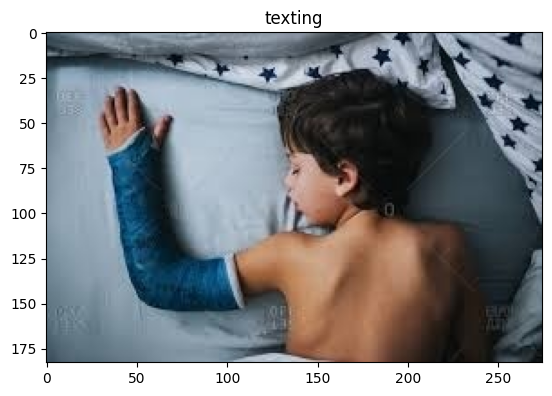

In [22]:
recognize('/content/Human Action Recognition/test/Image_1.jpg')

1/1 [==============================] - 0s 28ms/step
probability: 99.99644756317139%
Predicted class :  calling


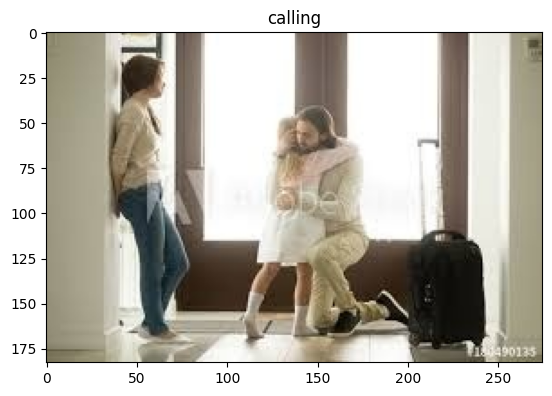

In [23]:
recognize('/content/Human Action Recognition/test/Image_1003.jpg')

In [24]:
pip install tqdm numpy Pillow


In [25]:
from tqdm import tqdm
import numpy as np
from PIL import Image  # Make sure you have imported Image from the PIL library

img_test = []
size = len(x_test)
for i in tqdm(range(size)):
    image = Image.open('/content/Human Action Recognition/train/' + x_test[i])
    img_test.append(np.asarray(image.resize((160, 160))))

Acc = model.evaluate(np.asarray(img_test), y_test) * 100
print(f"Accuracy: {Acc[1]}")


100%|██████████| 1260/1260 [00:02<00:00, 449.96it/s]


40/40 [==============================] - 3s 67ms/step - loss: 11.2511 - accuracy: 0.5548
Accuracy: 0.5547618865966797


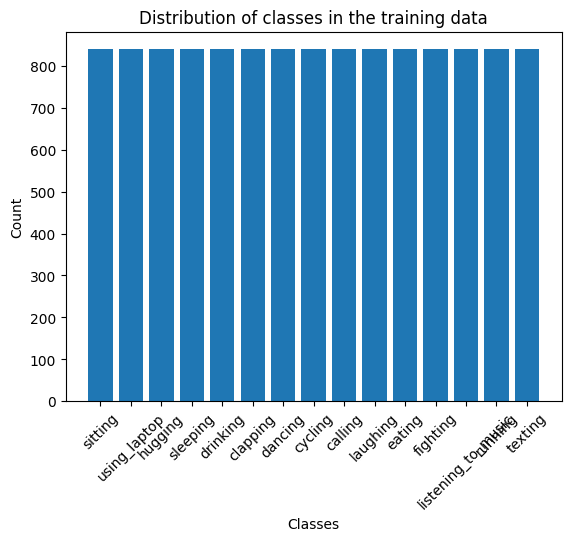

In [26]:
plt.bar(counts.index, counts.values)
plt.title('Distribution of classes in the training data')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate the x-axis labels by 45 degrees
plt.show()

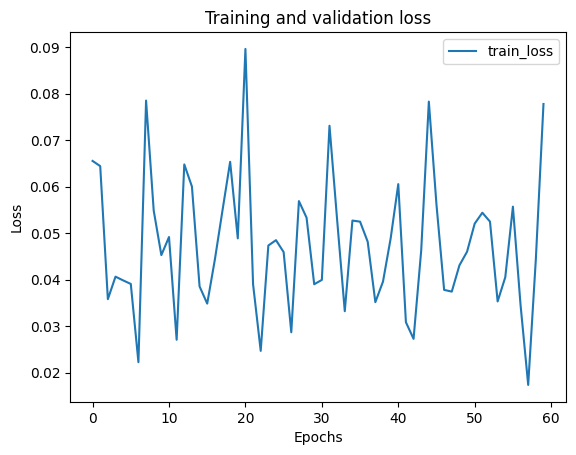

In [27]:
plt.plot(history.history['loss'], label='train_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

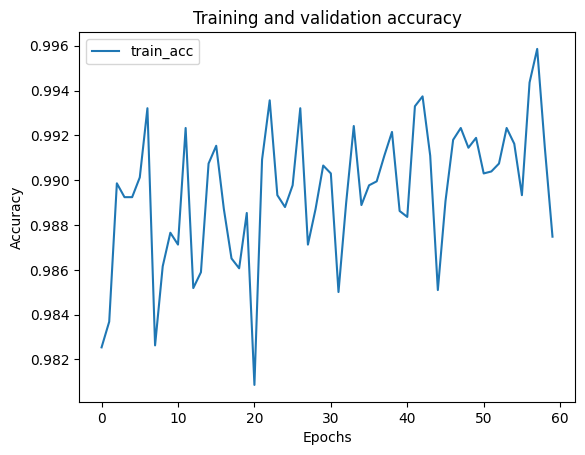

In [28]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()